# CSL558: Machine Learning 


## Module 5: Deep Learning



# Tutorial 5.2:  Image classification using Deep Neural Network using keras

**In this tutorial,a brief introduction to classify images using Deep NN classifier has been provided**

**Classification** is a technique where we categorize data into a given number of classes. The main goal of a classification problem is to identify the category/class to which a new data will fall under.

Few of the terminologies encountered in machine learning – classification: 

a. *Classifier*: An algorithm that maps the input data to a specific category.

b. *Classification model*: A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

c. *Feature*: A feature is an individual measurable property of a phenomenon being observed.

d. *Binary Classification*: Classification task with two possible outcomes. Eg: Gender classification (Male / Female)
Multi-class classification: Classification with more than two classes. In multi class classification each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time

e. *Multi-label classification*: Classification task where each sample is mapped to a set of target labels (more than one class). Eg: A news article can be about sports, a person, and location at the same time.


**The following are the steps involved in building a classification model:**

1. Initialize the classifier to be used.
2. Train the classifier: All classifiers in scikit-learn uses a fit(X, y) method to fit the model(training) for the given train data X and train label y.
3. Predict the target: Given an unlabeled observation X, the predict(X) returns the predicted label y.
4. Evaluate the classifier model

**Let's discuss the code**

Following code discusses binary classification problem.

It classifies the image into two classes Airplane or Bird.

The dataset used for training and testing contains 500 images of each class.

Samples are taken from CIFAR-10 dataset.

*******************************************************************************************************************************

**Import the necessary packages**

In [1]:
import os                   # accessing folders and files 
import numpy as np          # to use functions of numpy 

In [2]:
from keras.models import Sequential          #  Sequential class is created and model layers are created and added to it
from keras.layers import Activation, Dense   # 
from keras import optimizers
from keras import applications
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical  # Converts a class vector to binary class matrix.

In [3]:
# # Only require for google colab 
# from google.colab import drive
# drive.mount('/content/drive')

**Following function reads images from the folder.**

![](flat.png)

In [4]:
def flatten_images(folder):               # Path of folder (dataset)
    images=[]                             # list contatining  all images
    for filename in os.listdir(folder):
        print(filename)
        img=plt.imread(folder+filename)  # reading image (Folder path and image name )
        img=np.array(img)                #
        img=img.flatten()                # Flatten image 
        images.append(img)               # Appending all images in 'images' list 
    return(images)

In [5]:
airplane_data = flatten_images('NN_data/airplane/')  # calling the function above to compute airplane images

## The size of image is 32x32*3 (RGB)

13324_airplane.png
10667_airplane.png
14778_airplane.png
14335_airplane.png
12429_airplane.png
13835_airplane.png
13043_airplane.png
12149_airplane.png
11642_airplane.png
13860_airplane.png
11887_airplane.png
12730_airplane.png
13420_airplane.png
11633_airplane.png
13964_airplane.png
14488_airplane.png
10215_airplane.png
12420_airplane.png
11879_airplane.png
12820_airplane.png
11487_airplane.png
12009_airplane.png
11618_airplane.png
14350_airplane.png
10513_airplane.png
10689_airplane.png
13248_airplane.png
10729_airplane.png
10637_airplane.png
9945_airplane.png
10553_airplane.png
14652_airplane.png
14434_airplane.png
11535_airplane.png
12883_airplane.png
11029_airplane.png
11431_airplane.png
11919_airplane.png
13650_airplane.png
14080_airplane.png
11835_airplane.png
14509_airplane.png
13649_airplane.png
12817_airplane.png
14193_airplane.png
10952_airplane.png
10589_airplane.png
14069_airplane.png
11475_airplane.png
13490_airplane.png
12540_airplane.png
14325_airplane.png
10326_airplan

11775_airplane.png
10124_airplane.png
14169_airplane.png
11762_airplane.png
10265_airplane.png
13801_airplane.png
13712_airplane.png
14585_airplane.png
13817_airplane.png
10545_airplane.png
10847_airplane.png
12469_airplane.png
12192_airplane.png
10151_airplane.png
12461_airplane.png
14698_airplane.png
12393_airplane.png
12181_airplane.png
13174_airplane.png
12493_airplane.png
10130_airplane.png
12129_airplane.png
10574_airplane.png
14116_airplane.png
10716_airplane.png
14194_airplane.png
13570_airplane.png
9925_airplane.png
13627_airplane.png
14654_airplane.png
14138_airplane.png
14216_airplane.png
13751_airplane.png
10741_airplane.png
13864_airplane.png
10487_airplane.png
10493_airplane.png
12133_airplane.png
10064_airplane.png
11958_airplane.png
13016_airplane.png
9966_airplane.png
11661_airplane.png
11734_airplane.png
14550_airplane.png
12542_airplane.png
10332_airplane.png
11849_airplane.png
14615_airplane.png
13716_airplane.png
10954_airplane.png
12297_airplane.png


In [6]:
airplane_data=np.array(airplane_data)    # converting list into numpy array
airplane_data.shape                      # print shape of array

(500, 3072)

In [7]:
# airplane_data

array([[0.69803923, 0.7254902 , 0.7607843 , ..., 0.3764706 , 0.36078432,
        0.32941177],
       [0.6117647 , 0.5764706 , 0.5568628 , ..., 0.4509804 , 0.4117647 ,
        0.3764706 ],
       [0.3137255 , 0.15686275, 0.05098039, ..., 0.8392157 , 0.6862745 ,
        0.47843137],
       ...,
       [0.92156863, 0.95686275, 0.99607843, ..., 0.1882353 , 0.19215687,
        0.1254902 ],
       [0.50980395, 0.5921569 , 0.7137255 , ..., 0.54509807, 0.62352943,
        0.7529412 ],
       [0.21176471, 0.29411766, 0.48235294, ..., 0.4627451 , 0.4117647 ,
        0.20392157]], dtype=float32)

In [8]:
# same as above but for bird data
bird_data=flatten_images('NN_data/bird/')
bird_data=np.array(bird_data)
bird_data.shape

10660_bird.png
11348_bird.png
9952_bird.png
9940_bird.png
11456_bird.png
12892_bird.png
138_bird.png
10683_bird.png
13698_bird.png
11452_bird.png
10742_bird.png
12200_bird.png
10802_bird.png
12992_bird.png
13114_bird.png
12790_bird.png
13655_bird.png
11629_bird.png
14012_bird.png
10968_bird.png
13408_bird.png
13437_bird.png
10469_bird.png
11433_bird.png
9876_bird.png
12784_bird.png
13564_bird.png
12549_bird.png
13270_bird.png
14296_bird.png
12742_bird.png
12376_bird.png
12584_bird.png
11221_bird.png
12504_bird.png
13891_bird.png
9989_bird.png
11193_bird.png
11194_bird.png
11362_bird.png
13275_bird.png
12060_bird.png
12219_bird.png
13934_bird.png
10671_bird.png
14435_bird.png
13557_bird.png
13559_bird.png
13141_bird.png
12819_bird.png
11478_bird.png
90_bird.png
14154_bird.png
11545_bird.png
11746_bird.png
10093_bird.png
12148_bird.png
11745_bird.png
12074_bird.png
11050_bird.png
12720_bird.png
12748_bird.png
12694_bird.png
10398_bird.png
11175_bird.png
11084_bird.png
55_bird.png
13970_b

(500, 3072)

In [9]:
# np.ones creates an array of ones (where 1 is the label) with only 
# one column and number of rows same as airplane images
airplane_labels=np.ones((len(airplane_data),1))

# np.zeros creates an array of ones (where 1 is the label) with only
# one column and number of rows same as airplane features
bird_labels=np.zeros((len(bird_data),1))

**Create feature vector and corresponding label vector containing both the classes airplane and bird**

In [10]:
labels=np.concatenate((airplane_labels,bird_labels),axis=0)
features=np.concatenate((airplane_data,bird_data),axis=0)


In [17]:
# features, labels

(array([[0.69803923, 0.7254902 , 0.7607843 , ..., 0.3764706 , 0.36078432,
         0.32941177],
        [0.6117647 , 0.5764706 , 0.5568628 , ..., 0.4509804 , 0.4117647 ,
         0.3764706 ],
        [0.3137255 , 0.15686275, 0.05098039, ..., 0.8392157 , 0.6862745 ,
         0.47843137],
        ...,
        [0.07843138, 0.09411765, 0.05490196, ..., 0.45490196, 0.4117647 ,
         0.35686275],
        [0.78039217, 0.81960785, 0.6509804 , ..., 0.9529412 , 0.9490196 ,
         0.74509805],
        [0.4862745 , 0.5568628 , 0.34901962, ..., 0.5411765 , 0.58431375,
         0.3764706 ]], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
  

In [18]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

**ANN will be used for classification** 

In [19]:
# Build the model.
model = Sequential([
  Dense(1024, activation='relu', input_shape=(3072,)),
  Dense(128, activation='relu'),
  Dense(32, activation='relu'),  
  Dense(2, activation='softmax'),
])

3146752

In [22]:
# summarize layers
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 3,282,146
Trainable params: 3,282,146
Non-trainable params: 0
_________________________________________________________________
None


#### Why these Paramters ??? 

*Hint:* 3072*1024 +1024

In [21]:
# Compile the model.
import tensorflow as tf
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# Explore more paramters of model.

In [38]:
# ?model.compile

In [20]:
# Train the model.
history=model.fit(
  X_train,
  to_categorical(y_train),
  epochs=30,
  batch_size=128,
  validation_data=(X_test, to_categorical(y_test))  # A binary matrix representation of the input.
)

Epoch 1/30
7/7 [==============================] - 2s 280ms/step - loss: 1.7031 - accuracy: 0.5138 - auc: 0.5326 - precision: 0.5138 - recall: 0.5138 - val_loss: 0.8699 - val_accuracy: 0.5150 - val_auc: 0.5323 - val_precision: 0.5150 - val_recall: 0.5150
Epoch 2/30
7/7 [==============================] - 1s 85ms/step - loss: 0.8373 - accuracy: 0.5263 - auc: 0.5685 - precision: 0.5263 - recall: 0.5263 - val_loss: 0.6963 - val_accuracy: 0.5050 - val_auc: 0.6291 - val_precision: 0.5050 - val_recall: 0.5050
Epoch 3/30
7/7 [==============================] - 1s 83ms/step - loss: 0.7361 - accuracy: 0.5512 - auc: 0.6235 - precision: 0.5512 - recall: 0.5512 - val_loss: 0.6119 - val_accuracy: 0.6950 - val_auc: 0.7378 - val_precision: 0.6950 - val_recall: 0.6950
Epoch 4/30
7/7 [==============================] - 1s 86ms/step - loss: 0.6339 - accuracy: 0.6325 - auc: 0.6939 - precision: 0.6325 - recall: 0.6325 - val_loss: 0.6280 - val_accuracy: 0.6700 - val_auc: 0.7171 - val_precision: 0.6700 - val_re

In [28]:
results=model.evaluate(X_test,to_categorical(y_test),batch_size=128)
print('\n')
print('Test Loss :', results[0])
print('Test Acc :', results[1])
print('Test Auc :', results[2])
print('Test Precision :', results[3])
print('Test Recall :', results[4])

2/2 [==============================] - 0s 18ms/step - loss: 0.5367 - accuracy: 0.7500 - auc_1: 0.8259 - precision_1: 0.7500 - recall_1: 0.7500


Test Loss : 0.5366974472999573
Test Acc : 0.75
Test Auc : 0.8259124159812927
Test Precision : 0.75
Test Recall : 0.75


**Training and testing accuracy**

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])


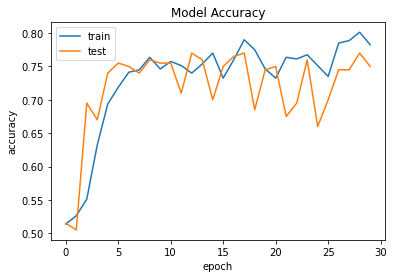

In [29]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# ls

**Test each image inside test_images folder placed inside data folder and find its corresponding class**

In [32]:
test_folder='NN_data/test_images/'   
results=[]
for filename in os.listdir(test_folder):
    temp=[]
    img=plt.imread(test_folder+filename)
    img=np.array(img)
    img=img.flatten()
    inp=np.reshape(img,(1,3072))
    prediction_result=model.predict(inp)
    x=np.argmax(prediction_result)
    if(x==0):
        pred_class_name='bird'
    else:
        x=1
        pred_class_name='Airplane'
    temp.append(filename)
    temp.append(pred_class_name)
    temp.append(prediction_result[0][x]*100)
    results.append(temp)

**Results with image name and predicted class name**

In [33]:
results=np.array(results)

In [34]:
results

array([['38560_bird.png', 'bird', '89.63062167167664'],
       ['38623_bird.png', 'bird', '91.00991487503052'],
       ['38565_bird.png', 'bird', '67.28829145431519'],
       ['49868_airplane.png', 'Airplane', '99.05394315719604'],
       ['38563_bird.png', 'bird', '85.28883457183838'],
       ['49994_airplane.png', 'Airplane', '57.940542697906494'],
       ['38573_bird.png', 'bird', '86.44843101501465'],
       ['49992_airplane.png', 'Airplane', '57.9703688621521'],
       ['38622_bird.png', 'bird', '96.71529531478882'],
       ['49941_airplane.png', 'bird', '58.26848745346069'],
       ['38638_bird.png', 'bird', '69.74956393241882'],
       ['49930_airplane.png', 'Airplane', '84.66145992279053'],
       ['38594_bird.png', 'bird', '94.39751505851746'],
       ['49856_airplane.png', 'Airplane', '91.15326404571533'],
       ['38605_bird.png', 'bird', '86.59362196922302'],
       ['49891_airplane.png', 'Airplane', '77.55213975906372'],
       ['49869_airplane.png', 'Airplane', '69.825649

References:
1. https://scikit-learn.org/stable/
2. https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
3. https://keras.io/

**Reference :** 

- E&ICT Academy PDPM IIITDM Jabalpur